In [1]:
import sys
sys.path.append('..')

from src.fourier import FourierModel

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

import IPython.display as display

import warnings
warnings.filterwarnings("ignore")

In [3]:
time_serires_data = pd.read_excel('../data/Learning_data_part4.xlsx')

## Example 1

In [210]:
time_series_num = 19

test_series = time_serires_data.iloc[:, time_series_num].values

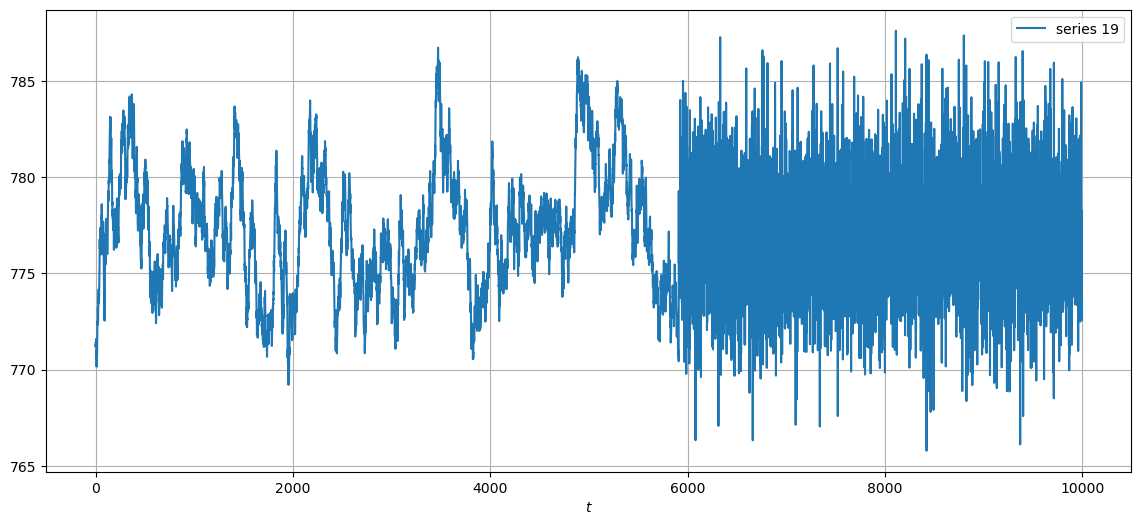

In [211]:
# plot series
fig, ax = plt.subplots(figsize=(14, 6))

for indx in [time_series_num]:
    ax.plot(test_series, label=f'series {indx}')

ax.legend()
ax.grid(True)
ax.set_xlabel('$t$');

In [212]:
# transfrom series shape
test_series = test_series.reshape((-1, 1))

In [218]:
# pca model
pca_model = FourierModel(test_series)

window_size = 50

discord_scores = pca_model.compute_discord_scores(window_size)

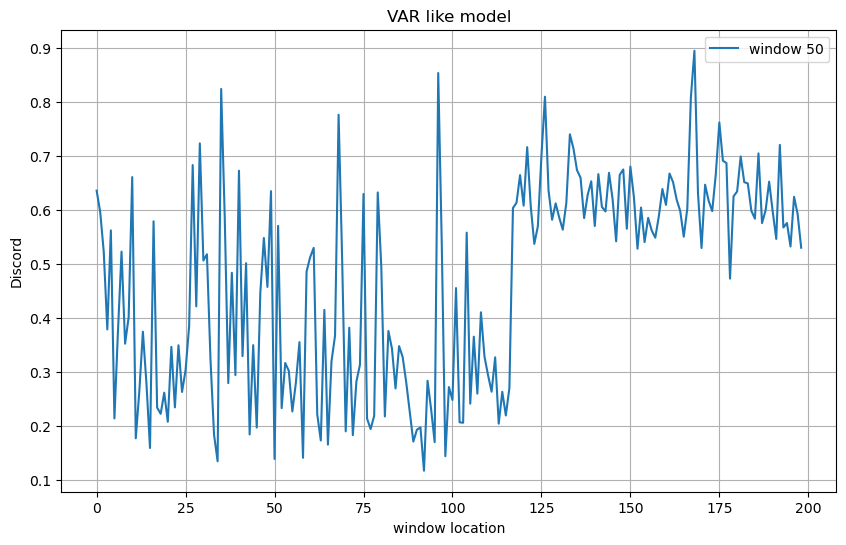

In [219]:
# plot discord function
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(discord_scores, label=f'window {window_size}')
    
ax.legend()
ax.grid(True)
ax.set_xlabel('window location');
ax.set_ylabel('Discord');
ax.set_title('VAR like model');

In [220]:
left_bound = 0
right_bound = len(discord_scores) - 1

while right_bound - left_bound > 4:
    lefter_point = left_bound + (right_bound - left_bound) // 4
    righter_point = right_bound - (right_bound - left_bound) // 4
    
    mean_diff_1 = np.mean(discord_scores[left_bound:lefter_point]) - np.mean(discord_scores[lefter_point:right_bound])
    mean_diff_1 = np.abs(mean_diff_1)
    mean_diff_2 = np.mean(discord_scores[left_bound:righter_point]) - np.mean(discord_scores[righter_point:right_bound])
    mean_diff_2 = np.abs(mean_diff_2)
    
    if mean_diff_1 > mean_diff_2:
        right_bound = righter_point
    else:
        left_bound = lefter_point

print(np.mean(discord_scores[:left_bound]) - np.mean(discord_scores[right_bound:]))

discord_point = left_bound + (right_bound - left_bound) // 2

-0.2686705346517369


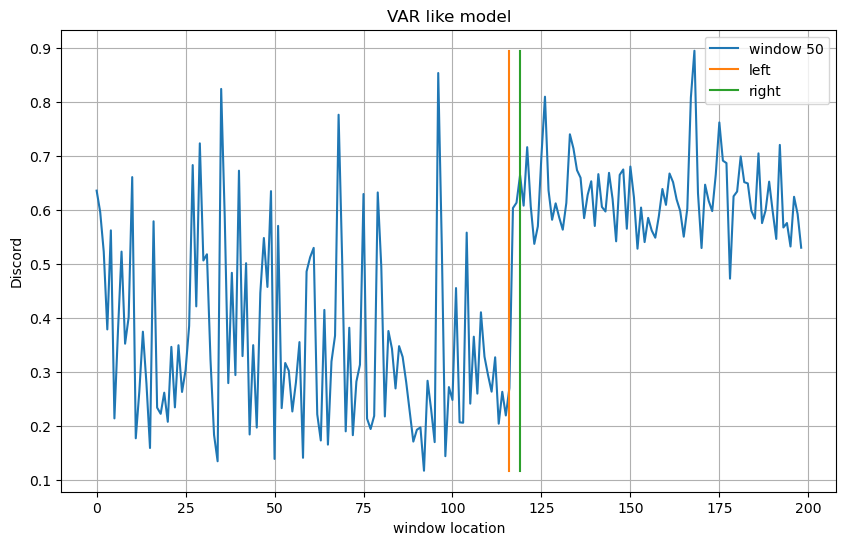

In [221]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(discord_scores, label=f'window {window_size}')

ax.plot(2 * [lefter_point], [np.min(discord_scores), np.max(discord_scores)], label='left')
ax.plot(2 * [righter_point], [np.min(discord_scores), np.max(discord_scores)], label='right')

ax.legend()
ax.grid(True)
ax.set_xlabel('window location');
ax.set_ylabel('Discord');
ax.set_title('VAR like model');

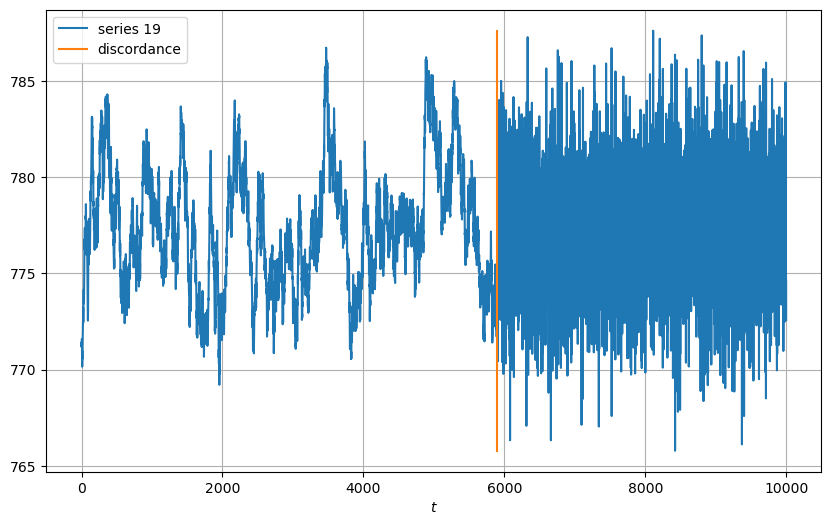

In [222]:
discord_point_ts = (window_size - 1) + discord_point  * window_size

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(test_series, label=f'series {indx}')

ax.plot([discord_point_ts] * 2, [np.min(test_series), np.max(test_series)], label='discordance')

ax.legend()
ax.grid(True)
ax.set_xlabel('$t$');

## Example 2

In [14]:
time_series_num = 21

test_series = time_serires_data.iloc[:, time_series_num].values

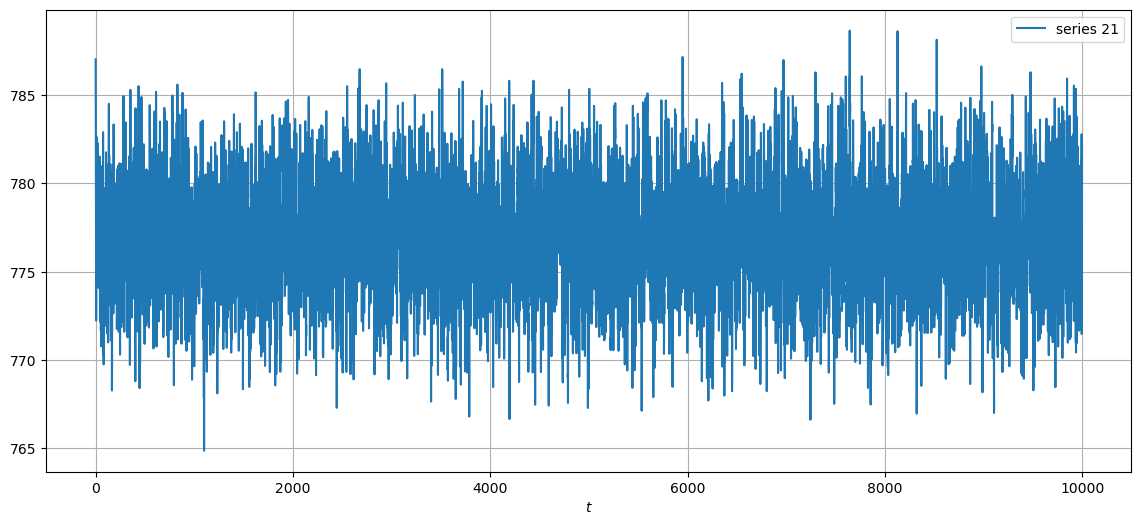

In [15]:
# plot series
fig, ax = plt.subplots(figsize=(14, 6))

for indx in [time_series_num]:
    ax.plot(test_series, label=f'series {indx}')

ax.legend()
ax.grid(True)
ax.set_xlabel('$t$');

In [161]:
# transfrom series shape
test_series = test_series.reshape((-1, 1))

In [162]:
# pca model
pca_model = VarLikeModel(test_series)

window_size = 50

discord_scores = pca_model.find_discord(window_size)

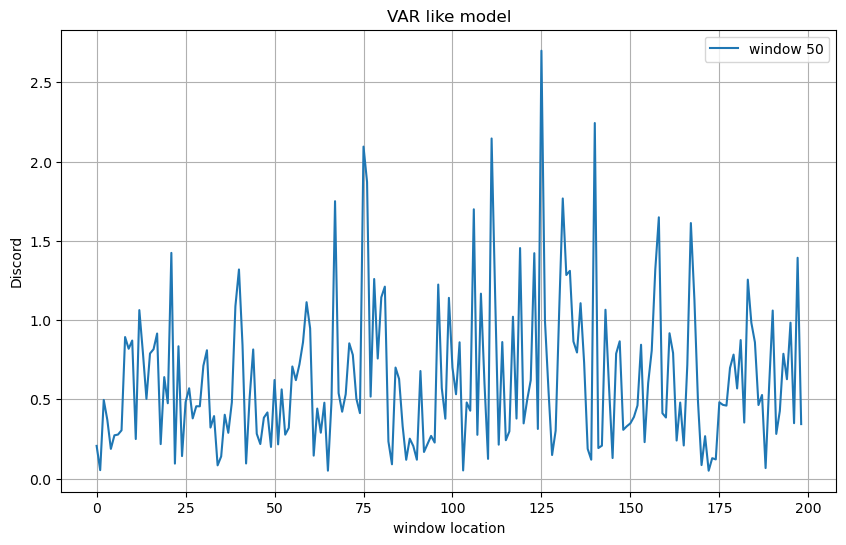

In [163]:
# plot discord function
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(discord_scores, label=f'window {window_size}')
    
ax.legend()
ax.grid(True)
ax.set_xlabel('window location');
ax.set_ylabel('Discord');
ax.set_title('VAR like model');

In [166]:
discord_point = -1

for i in range(5, len(discord_scores)):
    left_mean = np.mean(discord_scores[:i])
    left_std = np.std(discord_scores[:i])

    closest_max = np.max(discord_scores[i:i + 5])

    # we found some vicinity of discord point
    if (np.abs(left_mean - closest_max) > 7 * left_std):
        discord_point = i + np.argmax(discord_scores[i: i + 5 + 1])

        print(np.abs(left_mean - closest_max) / left_std)

        break

In [167]:
discord_point

-1

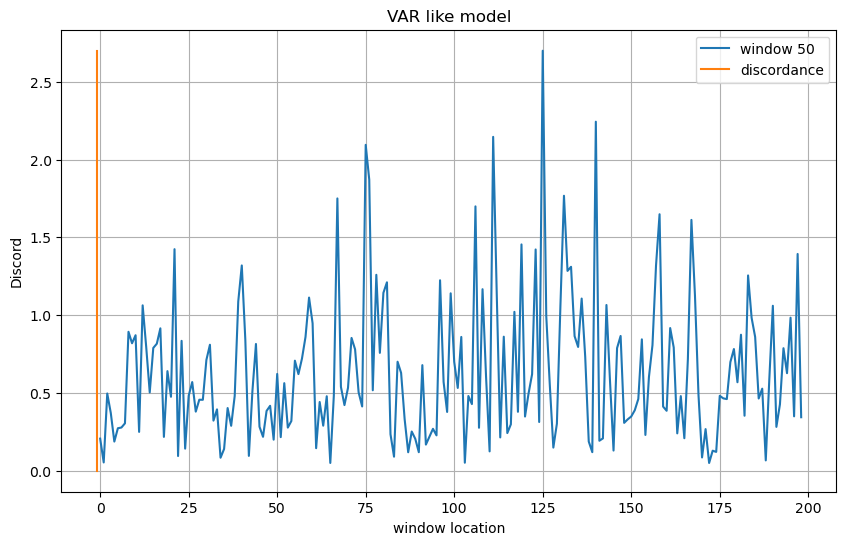

In [168]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(discord_scores, label=f'window {window_size}')

ax.plot([discord_point] * 2, [0, np.max(discord_scores)], label='discordance')

ax.legend()
ax.grid(True)
ax.set_xlabel('window location');
ax.set_ylabel('Discord');
ax.set_title('VAR like model');

In [169]:
# discord point in scale of time series
discord_point_ts = (window_size - 1) + discord_point  * window_size

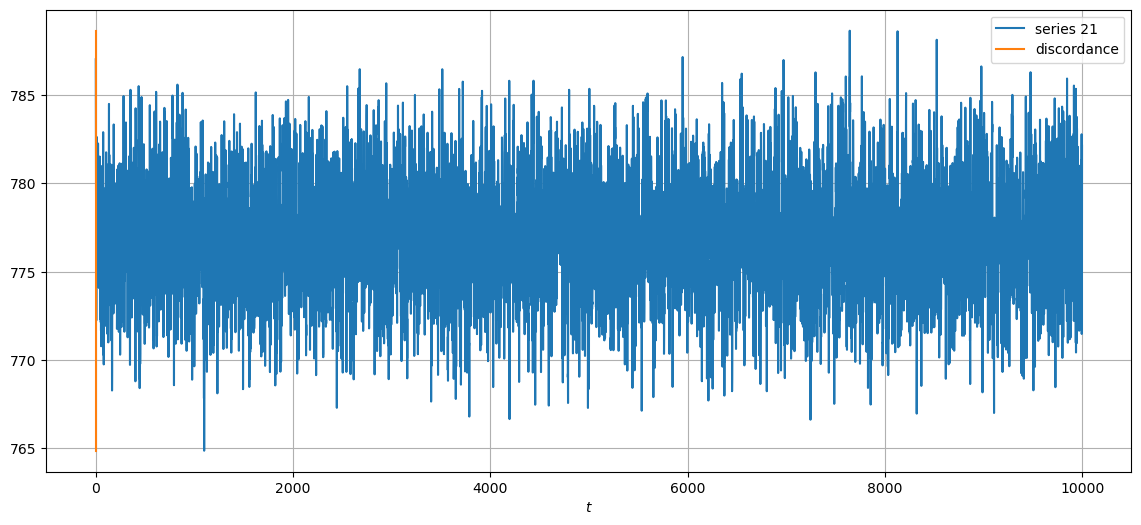

In [170]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(test_series, label=f'series {indx}')

ax.plot([discord_point_ts] * 2, [np.min(test_series), np.max(test_series)], label='discordance')

ax.legend()
ax.grid(True)
ax.set_xlabel('$t$');